<a href="https://colab.research.google.com/github/sauravdhauria/digit-prediction-using-trnsformers/blob/main/MNIST_digit_prediction_DNN_day_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

28 * 28 = 784
784-->128-->64-->10

Raw pixels -> low level feature (edges,curves) -> high level features (strokes,loop) -> digit predition

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import numpy  as np


# 1.LOAD MINIST DATASET
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

#normalize and flatten

x_train=x_train/255.0 #each pixel is stored as an integer between 0-225
x_test = x_test/255.0
x_train = x_train.reshape(-1,784)
x_test = x_test.reshape(-1,784)

In [ ]:
# Building DNN

model = models.Sequential([
    layers.Dense(128,activation='relu',input_shape=(784,)), # bring non linearity
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax') # normalize and predict no
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(x_train,y_train,epochs=3,validation_data=(x_test,y_test))

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9696 - loss: 0.1033 - val_accuracy: 0.9748 - val_loss: 0.0784
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9778 - loss: 0.0698 - val_accuracy: 0.9717 - val_loss: 0.0948
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9823 - loss: 0.0531 - val_accuracy: 0.9737 - val_loss: 0.0855


In [ ]:
# Predict
predictions = model.predict(x_test)
predict_labels = np.argmax(predictions,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# VISUALIZATON FUNCTION

def plot_sample(i,predicts_array,true_label,img):
  pred_label= np.argmax(predicts_array)
  # true_label = true_label[i] # This line is causing the error
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img,cmap=plt.cm.binary)

  if pred_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel(f'pred:{pred_label},True:{true_label}',color=color)

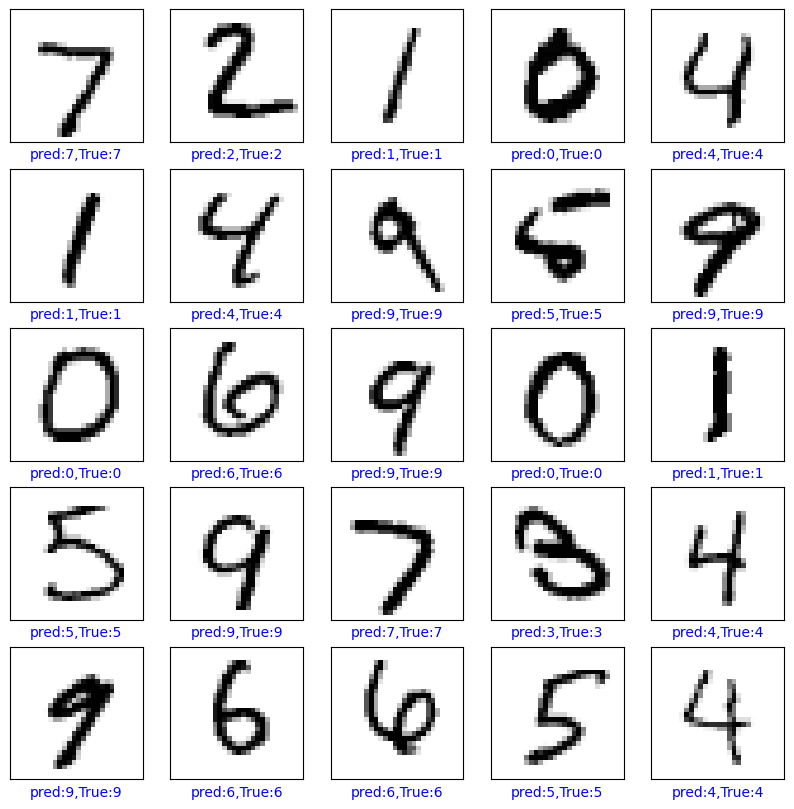

In [ ]:
# Show first 25 predict
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plot_sample(i,predictions[i],y_test[i],x_test[i].reshape(28,28))
plt.show()